In [91]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
%matplotlib inline

In [92]:
files=glob.glob("./imagenes/*.png")
print(np.shape(files))

(87,)


In [113]:
X=[]
m=len(files)
for img in files[:m]:
    data = plt.imread("{}".format(img))
    X = np.append(X,data.reshape((-2,1)))
    #X = np.append(X,data.reshape((-1,3)))
#    print(img)

In [114]:
#X=X.reshape((10000,len(files[:1])))
X=X.reshape((30000,len(files[:m])))
print(np.shape(X))
print(np.shape(data))

(30000, 87)
(100, 100, 3)


In [131]:
n_max=20
inertia=[]
rsd=[]
for n_clusters in range(1,n_max):
    k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
    distances = k_means.fit(X)
    cluster = k_means.predict(X)
    X_centered = X.copy()
    for i in range(n_clusters):
        ii = cluster==i
#        X_centered[ii,:] = np.int_(k_means.cluster_centers_[i])
        X_centered[ii,:] = k_means.cluster_centers_[i]
    data_centered = X_centered.reshape((30000,len(files[:m])))
#inertia
    if(n_clusters==5):
        rsd=np.append(rsd,(X-data_centered)**2)
        rsd=rsd.reshape((30000,len(files[:m])))
    inertia=np.append(inertia,np.sum((X-data_centered)**2))
# variance = 0
# i = 0
# for label in k_means.labels_:
#     variance = variance + distances[i][label]
#     i = i + 1

Text(0.5, 15.0, 'N° of clusters')

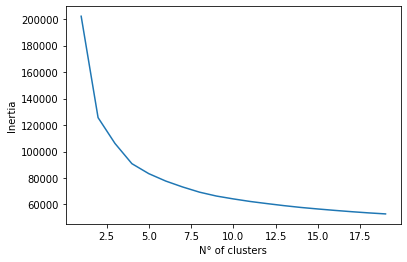

In [118]:
#plt.figure(figsize=(10,5))
plt.plot(np.arange(1,n_max),inertia)
plt.savefig("inertia.png")
plt.ylabel("Inertia")
plt.xlabel("N° of clusters")


# tomamos N° of clusters k=3

In [139]:
print(np.shape(rsd[:,0]))
a=data_centered.reshape((100,100,3,len(files[:m])))

(30000,)


In [130]:
norm=[]
for i in range(len(files[:m])):
    norm=np.append(norm,np.sum(rsd[:,i]))
#print(np.shape(rsd))
#30000*87

In [141]:
print(np.shape(a[:,:,:,0]))

(100, 100, 3)


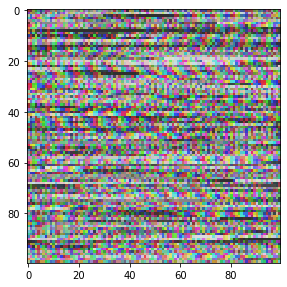

In [143]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(a[:,:,:,0])
# plt.title("Original")

# plt.subplot(1,2,2)
# plt.imshow(data_centered)
# plt.title("{} colores".format(n_clusters))